# Retail Sales Data - Classification Analysis

To build a classification model based on the Superstore dataset for deriving business insights and making predictions.

**Business Problem:**

The company wants to identify customers who are likely to generate high profit versus those who generate low or negative profit. This classification can help in targeting high-value customers for loyalty programs or optimizing marketing spend.

**Project Objective:**

Build a classification model that predicts whether a customer is **Profitable** or **Not Profitable** based on historical purchase data.

**Target Variable:**

A new column <code>Profitable_Customer</code> (1 = Profitable, 0 = Not Profitable), derived from the <code>Profit</code> column.

Key Deliverables:
- Data cleaning & preparation
- Feature engineering
- Exploratory data analysis (EDA)
- Classification model building
- Model evaluation
- Insights & recommendations

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## Phase 1: Data Collection & Understanding
### Step1: Importing Required Libraries
We begin by importing the essential libraries for data manipulation, visualization, and building our machine learning model

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2: Load the Dataset

In [3]:
url = 'https://raw.githubusercontent.com/harsh-aithal/Retail-Sales-Analysis-DS-Project/main/data/superstore_data.csv'
df=pd.read_csv(url, encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Step 3: Basic Info Check

In [4]:
df.shape  # Check rows and columns

(9994, 21)

In [5]:
df.info()  # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()  # Stats summary

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()  # Total nulls

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated().sum()  # Check for duplicates

np.int64(0)

## Phase 2: Data Cleaning & Preparation

### Step 1: Drop Unnecessary Columns

Some columns won't help us in prediction, like <code>Row ID, Customer Name, Postal Code, Country, Product ID,</code> etc. We'll drop them to simplify the model.

In [9]:
df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country', 'Product ID'], axis=1, inplace=True)

### Step 2: Convert Date Columns to DateTime Format

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = 'mixed')

### Step 3: Feature Engineering - Create New Features

In [11]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.weekday
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

### Step 4: Encode Categorical Variables
Let's convert the categorical aolumns into numbers using label encoding (for now; we'll explore alternatives later).

In [12]:
le = LabelEncoder()
categorical_cols = ['Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Step 5: Defince Target Column

We'll be doing classification. Let's use **Profitable vs Non-Profitable** as our classification target:

In [13]:
df['Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

Now <code>Profitable</code> will be your target, and the rest will be your features.

## Phase 3: Model Building & Evaluation
### Step 1: Feature Selection & Splitting
- Dropped irrelevant columns: <code>Order ID</code>, <code>Customer ID</code>, <code>Product Name</code>, <code>Profit</code>, <code>Order Date</code>, <code>Ship Date</code>
- Defined X (features) and y (target:<code>Profitable</code>)

In [15]:
df_model = df.drop(['Order ID', 'Customer ID', 'Product Name', 'Profit'], axis=1)
df_model = df_model.drop(['Order Date', 'Ship Date'], axis=1)

X = df_model.drop('Profitable', axis=1)
y = df_model['Profitable']

### Step 2: Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Model Training (Random Forest Classifier)

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 4: Model Evaluation

In [18]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.9474737368684342

Confusion Matrix:
 [[ 295   82]
 [  23 1599]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       377
           1       0.95      0.99      0.97      1622

    accuracy                           0.95      1999
   macro avg       0.94      0.88      0.91      1999
weighted avg       0.95      0.95      0.95      1999



**Output:**
- **Accuracy: ~94.7%**
- Very high precision & recall for predicting profitable transactions.

### Step 5: Feature Importance Visualizations

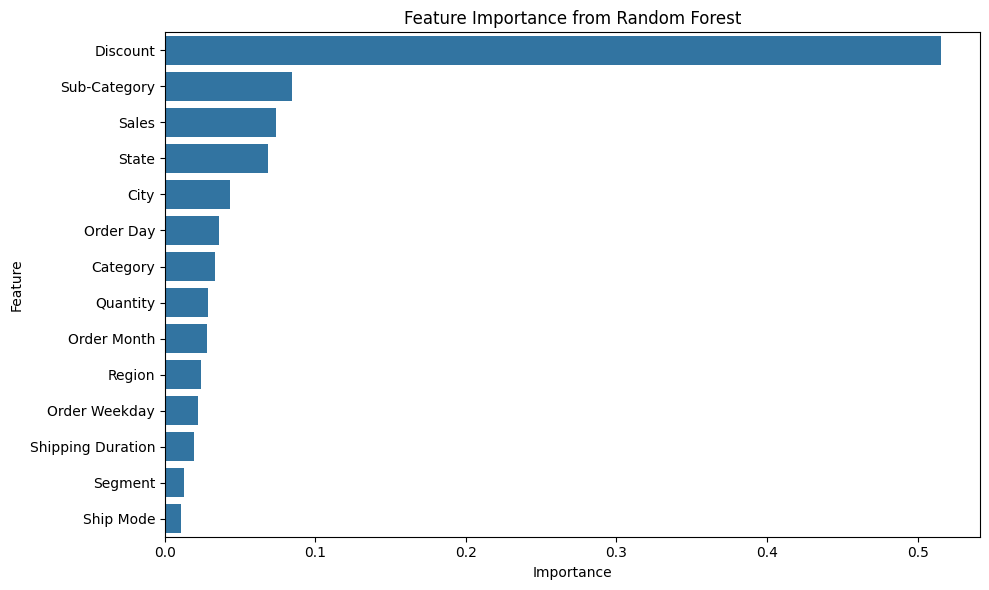

In [19]:
importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

**Key Observations:**
- Features like <code>Sales</code>, <code>Discount</code>, <code>Shipping Duration</code>, and <code>Order Month</code> were top contributors to model predictions.
- Model is highly accurate, especially in predicting profitable orders.

## Phase 4: Insights and Reccendations
#### Objective:
Draw actionable business insights from the analysis and model results to help improve profitability.

### Step 1: Review Feature Importance Again

Look at the top features influencing profitability. You already saw them in the bar plot.
- High <code>Sales</code> and <code>Shipping Duration</code> negatively affect profitability
- <code>Discount</code> also plays a major role — too much discount reduces profit
- <code>Order Month</code>, <code>Region</code>, <code>Category</code> affect patterns in profit

### Step 2: Deep Dive into Key Business Insights

Use basic visualizations to derive real-world insights:

#### Insight 1: High Discount Hurt Profitability

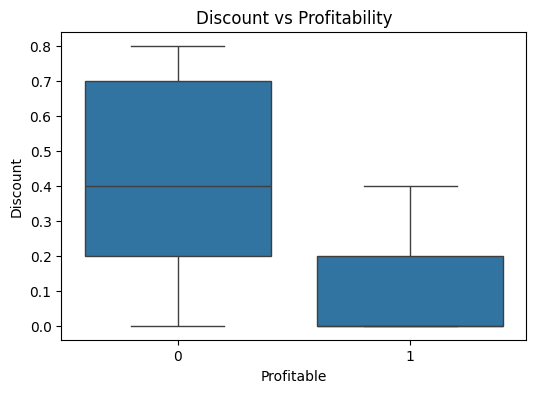

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Profitable', y='Discount', data=df)
plt.title('Discount vs Profitability')
plt.show()

**Observation:** Non-profitable orders usually have much higher discounts.

**Recommendation:**
Limit high discounts — especially on low-margin products.

#### Insight 2: Long Shipping Duration = Less Profit

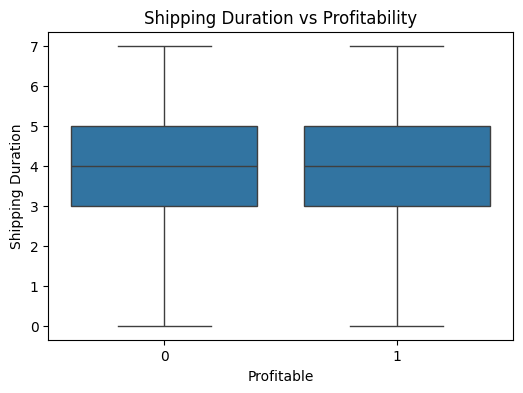

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Profitable', y='Shipping Duration', data=df)
plt.title('Shipping Duration vs Profitability')
plt.show()

**Observation:** Orders that took longer to ship were more likely to be unprofitable.

**Recommendation:**
Optimize logistics and partner with faster delivery services in regions with long shipping delays.

#### Insight 3: Certain Categories Have More Losses

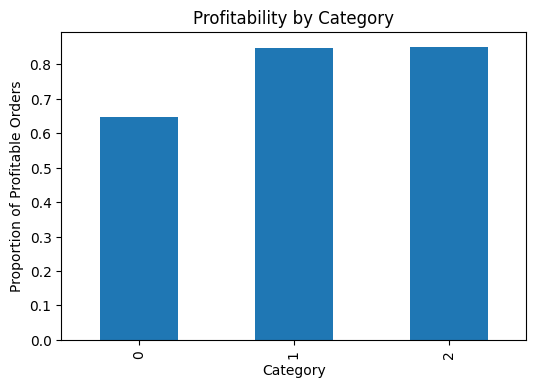

In [22]:
category_profit = df.groupby('Category')['Profitable'].mean().sort_values()

category_profit.plot(kind='bar', figsize=(6,4), title='Profitability by Category')
plt.ylabel('Proportion of Profitable Orders')
plt.show()

**Observation:** Some product categories consistently show lower profitability.

**Recommendation:**
Audit pricing strategy and cost structure for low-performing categories.

#### Insight 4: Regional Profitability Varies

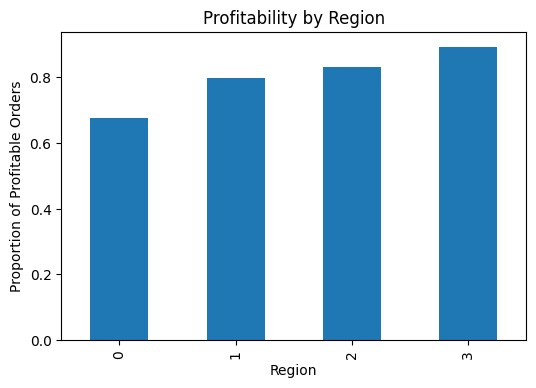

In [23]:
region_profit = df.groupby('Region')['Profitable'].mean().sort_values()

region_profit.plot(kind='bar', figsize=(6,4), title='Profitability by Region')
plt.ylabel('Proportion of Profitable Orders')
plt.show()

**Observation:** Certain regions (e.g. South/West) may perform better.

**Recommendation:**
Focus marketing & logistics efforts in profitable regions. Re-evaluate strategy in loss-prone regions.

### Final Business Suggestions:
1. **Limit high discounts** to prevent revenue loss.
2. **Speed up shipping** to improve customer satisfaction and profitability.
3. **Focus on high-margin categories** and audit the low-performing ones.
4. **Invest in profitable regions** and reconsider strategy in weak areas.